In [1]:
import os
#import sys
#import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
plt.style.use('seaborn-bright')
#directory of data
os.chdir("/Users/soumenbera/Documents/killing_Tcells")

In [2]:
data1 = pd.read_excel('para_8.xlsx')
#data transfer into hour
t1 = data1["Time"]/60.0 
print(t1)

0      4.000000
1      4.019315
2      4.038630
3      4.057945
4      4.077260
         ...   
110    6.124650
111    6.143965
112    6.163280
113    6.182595
114    6.201910
Name: Time, Length: 115, dtype: float64


In [3]:
print(data1)

     Slice  Parasite  Background  Tcells  Exp [Py()]   Parasite ID  \
0        1     168.9        93.0       8            1            8   
1        2     159.2        94.3       8            1            8   
2        3     143.6        91.6       8            1            8   
3        4     133.9        93.9       8            1            8   
4        5     121.8        93.2       8            1            8   
..     ...       ...         ...     ...          ...          ...   
110    111     127.3       110.0      10            1            8   
111    112     123.4       107.3       9            1            8   
112    113     126.9       109.3       9            1            8   
113    114     123.5       106.6       9            1            8   
114    115     125.8       108.2       9            1            8   

    Original ID  Time from Exp start (min)      Time  Intensity  
0       Py1(8A)                     0.0000  240.0000      168.9  
1       Py1(8A)            

[0.2591 0.2274 0.1953 0.1541 0.1162 0.1114 0.1004 0.0956 0.1069 0.1058
 0.105  0.1114 0.0951 0.0925 0.098  0.1123 0.0892 0.0913 0.0962 0.0964
 0.1149 0.0905 0.0882 0.1021 0.0712 0.0854 0.0858 0.0917 0.0906 0.0966
 0.0912 0.0835 0.087  0.0716 0.081  0.0902 0.0873 0.0832 0.084  0.086
 0.0874 0.0787 0.0771 0.0796 0.0802 0.0741 0.0764 0.0763 0.0716 0.0648
 0.0666 0.0517 0.0561 0.0491 0.0557 0.0619 0.0524 0.0595 0.0509 0.0562
 0.0573 0.0518 0.0384 0.0455 0.0471 0.0556 0.0553 0.05   0.0456 0.0455
 0.0407 0.0444 0.0424 0.0519 0.0487 0.0513 0.0434 0.0445 0.0522 0.0511
 0.0494 0.0516 0.0565 0.0563 0.0457 0.0682 0.0627 0.0523 0.0596 0.0546
 0.053  0.0568 0.0556 0.0606 0.0488 0.0643 0.0614 0.0687 0.0703 0.0868
 0.0955 0.0669 0.0657 0.0773 0.0666 0.0694 0.0761 0.0717 0.0693 0.0654
 0.0634 0.0607 0.0648 0.0639 0.0655]


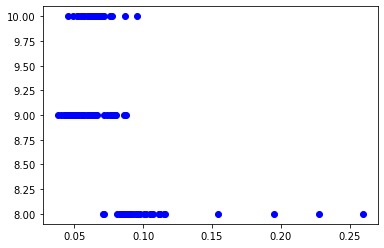

In [4]:
# data transfer into log10 scale as Vitality index (VI)
data2 = np.log10(data1["Intensity"]/data1["Background"]).values
t1 = (data1["Time"]/60.0).values
Tcells = data1["Tcells"]
#print(t1)
plt.plot(data2,Tcells,'ob')
print(data2)

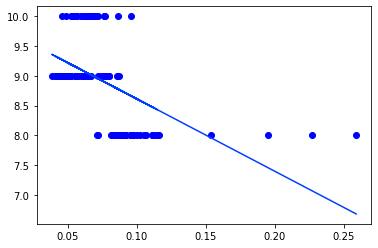

Intercept:  9.826452401966979
Slope:  [-12.1375]


In [5]:
# section only to understand slope 
from sklearn.linear_model import LinearRegression
x = np.array(data2).reshape((-1, 1))
y = np.array(Tcells)
reg = LinearRegression().fit(x,y)
#print(x)
plt.plot(data2,Tcells,'ob')
plt.plot(data2,reg.predict(x))
plt.show()
print("Intercept: ",reg.intercept_)
print("Slope: ",reg.coef_)

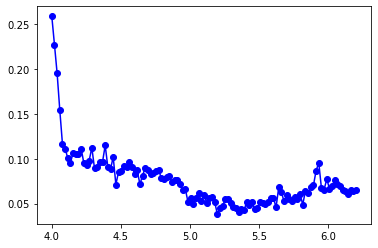

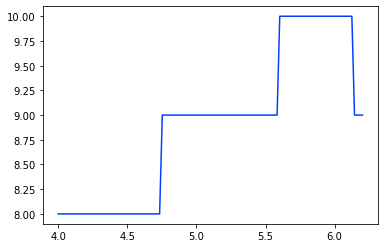

In [6]:
t = np.linspace(4.0,6.201910,115)
data2 = np.log10(data1["Intensity"]/data1["Background"])
data = data2.values
plt.plot(t,data,'-ob')
plt.show()
plt.plot(t,data1["Tcells"])
plt.show()

In [7]:
#Start with simple model with no Tcells
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def f1(xs, t, ps):
    """Receptor synthesis-internalization model."""
    try:
        r = ps['r'].value
        
    except:
        r = ps
    v = xs
    return r*v
    
def g1(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f1, x0, t, args=(ps,))
    return x

def residual1(ps, ts, data):
    x0 = ps['x0'].value
    model = pd.DataFrame(g1(ts, x0, ps), columns=['X'])
    #model1 = model.values
    return (model['X'].values - data).ravel()

[-1.8317e-01 -1.5146e-01 -1.1929e-01 -7.8143e-02 -4.0259e-02 -3.5394e-02
 -2.4442e-02 -1.9611e-02 -3.0904e-02 -2.9831e-02 -2.9000e-02 -3.5474e-02
 -1.9086e-02 -1.6573e-02 -2.2062e-02 -3.6293e-02 -1.3269e-02 -1.5365e-02
 -2.0264e-02 -2.0437e-02 -3.8972e-02 -1.4564e-02 -1.2238e-02 -2.6143e-02
  4.7637e-03 -9.4725e-03 -9.8342e-03 -1.5696e-02 -1.4587e-02 -2.0596e-02
 -1.5234e-02 -7.4971e-03 -1.0980e-02  4.3343e-03 -5.0330e-03 -1.4260e-02
 -1.1333e-02 -7.2276e-03 -8.0370e-03 -1.0019e-02 -1.1454e-02 -2.7638e-03
 -1.1236e-03 -3.6371e-03 -4.2355e-03  1.8789e-03 -4.5799e-04 -3.5971e-04
  4.4200e-03  1.1153e-02  9.3318e-03  2.4239e-02  1.9856e-02  2.6880e-02
  2.0280e-02  1.4120e-02  2.3525e-02  1.6489e-02  2.5112e-02  1.9777e-02
  1.8638e-02  2.4146e-02  3.7573e-02  3.0465e-02  2.8899e-02  2.0370e-02
  2.0674e-02  2.5923e-02  3.0341e-02  3.0429e-02  3.5240e-02  3.1594e-02
  3.3608e-02  2.4078e-02  2.7223e-02  2.4677e-02  3.2566e-02  3.1448e-02
  2.3794e-02  2.4864e-02  2.6567e-02  2.4331e-02  1

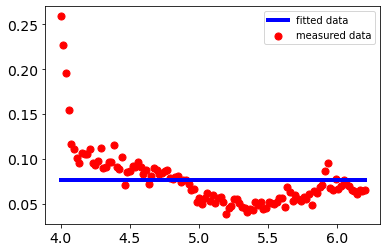

<Figure size 432x288 with 0 Axes>

115

In [8]:
r = 0.10625
#x0 = 0.2591
# set parameters incluing bounds
params = Parameters()
params.add('x0', value=0.07597226, min = 0.05, max = 0.4)
params.add('r', value= 2.9871e-09, min=0, max=50)

# fit model and find predicted values
result1 = minimize(residual1, params, args=(t, data), method='leastsq')
#final = data + result1.residual.reshape(data.shape)
data_fitted1 = data + result1.residual.reshape(data.shape)
print(result1.residual)
#result.residual.reshape(data.shape)
#final = data + result1.residual.reshape(data.shape)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
plt.figure()
ax.scatter(t, data, marker='o', color='red', label='measured data', s=50)
# plot fitted data
ax.plot(t, data_fitted1, '-', linewidth=4, color='blue', label='fitted data')
ax.legend()
# display fitted statistics
report_fit(result1)
#ax.set_xlim([3.9, 14])
#ax.set_ylim([0, 1.1])
ax.tick_params(axis='both',which = 'major',labelsize = 14)
ax.tick_params(axis='both',which = 'minor',labelsize = 12)
plt.show()
np.size(result1.residual)

In [9]:
# non linear Tcell responce from dd model
def Tcells(t):
    XX = (lamda0/lamdamu)*((np.exp(lamdamu*t))-1)
    return XX

In [10]:
#simple mass action model with Tcells
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def f2(xs, t, ps):
    try:
        r = ps['r'].value
        k = ps['k'].value
    except:
        r,k = ps
    v = xs
    T = (Tcells(t))
    return r*v-k*v*T
    
def g2(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f2, x0, t, args=(ps,))
    return x

def residual2(ps, ts, data):
    x0 = ps['x0'].value
    model = pd.DataFrame(g2(ts, x0, ps), columns=['X'])
    #model1 = model.values
    return (model['X'].values - data).ravel()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

rc = {'figure.figsize':(6,4),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 18}
plt.rcParams.update(rc)

[-0.1353 -0.1047 -0.0736 -0.0335  0.0033  0.0071  0.017   0.0208  0.0085
  0.0085  0.0083  0.0008  0.0162  0.0177  0.0112 -0.004   0.018   0.0149
  0.0091  0.0079 -0.0116  0.0119  0.0132 -0.0016  0.0284  0.0132  0.0119
  0.0051  0.0053 -0.0016  0.0029  0.0097  0.0053  0.0198  0.0095 -0.0006
  0.0015  0.0047  0.0031  0.0002 -0.0021  0.0058  0.0066  0.0033  0.0019
  0.0072  0.004   0.0033  0.0073  0.0133  0.0107  0.0248  0.0196  0.0259
  0.0185  0.0116  0.0203  0.0125  0.0204  0.0143  0.0125  0.0173  0.03
  0.0222  0.0199  0.0107  0.0103  0.0149  0.0186  0.018   0.0222  0.0179
  0.0192  0.009   0.0115  0.0084  0.0156  0.0139  0.0056  0.0061  0.0071
  0.0043 -0.0012 -0.0016  0.0084 -0.0147 -0.0097  0.0001 -0.0077 -0.0034
 -0.0023 -0.0067 -0.0059 -0.0115 -0.0003 -0.0162 -0.0139 -0.0218 -0.0238
 -0.0408 -0.0501 -0.022  -0.0213 -0.0334 -0.0232 -0.0264 -0.0337 -0.0297
 -0.0278 -0.0244 -0.0229 -0.0206 -0.0252 -0.0247 -0.0267]
[[Fit Statistics]]
    # fitting method   = leastsq
    # function e

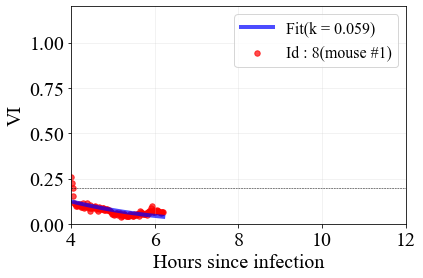

<Figure size 432x288 with 0 Axes>

In [12]:
r = 0.10625
k = 0.06891
x0 = 0.2591
x0 = 0.2591
lamda0 = 2.709
lamdamu = -0.18
# set parameters incluing bounds
params = Parameters()
params.add('x0', value= 0.12379837, min = 0.05, max = 0.4)
#params.add('r', value= 5.3050e-09, min=0, max=50)
params.add('r', value= 0.0, vary = False)
params.add('k', value= 0.05858085, min=0, max=20)
# fit model and find predicted values
result2 = minimize(residual2, params, args=(t, data), method='leastsq')
#final = data + result.residual.reshape(data.shape)
data_fitted2 = data + result2.residual.reshape(data.shape)
print(result2.residual)
#result.residual.reshape(data.shape)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
plt.figure()
ax.scatter(t, data, marker='o', color='red', label='Id : 8(mouse #1)', s=30,alpha=0.7)
# plot fitted data
ax.plot(t, data_fitted2, '-', linewidth=4, color='blue', label='Fit(k = 0.059)',alpha=0.7)

ax.set_xlim([4.0,12])
ax.set_ylim([0.0,1.2])
# display fitted statistics
report_fit(result2)
#ax.set_xlim([3.9, 14])
#ax.set_ylim([0, 1.1])
ax.set_ylabel('VI', fontsize=20)
ax.set_xlabel('Hours since infection', fontsize=20)
ax.legend(fontsize=16,frameon = bool)
ax.axhline(y=0.2, color='k', linestyle='--', alpha=1, linewidth=0.5)
ax.tick_params(axis='both',which = 'major',labelsize = 20)
ax.tick_params(axis='both',which = 'minor',labelsize = 20)
#ax.text(8,0.75,'k = 0.059/h',style='italic',fontsize=18)
ax.grid(True,which='both',alpha=0.3)
#ax.set_title("Id = 8(mouse #1): dying", fontsize = 20)
plt.show()
#fig.tight_layout()
fig.savefig('/Users/soumenbera/Documents/ode-fit-8.png', format='png', dpi=300, bbox_inches = "tight")

In [16]:
#Non-linear Tcells response with paramiter n and k
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def f3(xs, t, ps):
    try:
        r = ps['r'].value
        k = ps['k'].value
        n = ps['n'].value
    except:
        r,k,n = ps
    v = xs
    T = (Tcells(t))**n
    return r*v-k*v*T
    
def g3(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f3, x0, t, args=(ps,))
    return x

def residual3(ps, ts, data):
    x0 = ps['x0'].value
    model = pd.DataFrame(g3(ts, x0, ps), columns=['X'])
    #model1 = model.values
    return (model['X'].values - data).ravel()

[-1.3175e-01 -1.0133e-01 -7.0446e-02 -3.0576e-02  6.0466e-03  9.6642e-03
  1.9380e-02  2.2989e-02  1.0486e-02  1.0361e-02  1.0007e-02  2.3593e-03
  1.7586e-02  1.8950e-02  1.2323e-02 -3.0342e-03  1.8874e-02  1.5675e-02
  9.6843e-03  8.4299e-03 -1.1175e-02  1.2175e-02  1.3452e-02 -1.4903e-03
  2.8389e-02  1.3137e-02  1.1769e-02  4.9110e-03  5.0345e-03 -1.9494e-03
  2.4467e-03  9.2278e-03  4.7990e-03  1.9177e-02  8.8827e-03 -1.2612e-03
  7.5692e-04  3.9641e-03  2.2652e-03 -5.9687e-04 -2.9040e-03  4.9238e-03
  5.7102e-03  2.3517e-03  9.1682e-04  6.2033e-03  3.0470e-03  2.3342e-03
  6.3110e-03  1.2249e-02  9.6417e-03  2.3770e-02  1.8617e-02  2.4878e-02
  1.7524e-02  1.0616e-02  1.9282e-02  1.1513e-02  1.9412e-02  1.3360e-02
  1.1511e-02  1.6317e-02  2.9048e-02  2.1252e-02  1.9005e-02  9.8013e-03
  9.4377e-03  1.4026e-02  1.7790e-02  1.7231e-02  2.1401e-02  1.7121e-02
  1.8508e-02  8.3563e-03  1.0886e-02  7.7316e-03  1.5019e-02  1.3304e-02
  5.0602e-03  5.5456e-03  6.6711e-03  3.8622e-03 -1

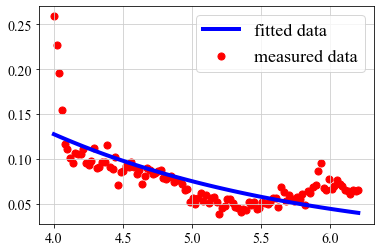

<Figure size 432x288 with 0 Axes>

In [17]:
r = 5.3050e-09
x0 = 0.12379837
lamda0 = 2.709
lamdamu = -0.185
k = 0.05858085
n = 1.0
# set parameters incluing bounds
params = Parameters()
params.add('x0', value= 0.12379837, min = 0.05, max = 0.4)
#params.add('r', value= 5.3050e-09, min=0, max=10)
params.add('r', value= 0.0, vary = False)
params.add('k', value= 0.05858085, min=0.0, max=10)
params.add('n', value = 1.000, min = 0.0,max=10)
# fit model and find predicted values
result3 = minimize(residual3, params, args=(t, data), method='leastsq')
#final = data + result.residual.reshape(data.shape)
data_fitted3 = data + result3.residual.reshape(data.shape)
print(result3.residual)
#result.residual.reshape(data.shape)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
plt.figure()
ax.scatter(t, data, marker='o', color='red', label='measured data', s=50)
# plot fitted data
ax.plot(t, data_fitted3, '-', linewidth=4, color='blue', label='fitted data')
ax.legend()
# display fitted statistics
report_fit(result3)
#ax.set_xlim([3.9, 14])
#ax.set_ylim([0, 1.1])
ax.tick_params(axis='both',which = 'major',labelsize = 14)
ax.tick_params(axis='both',which = 'minor',labelsize = 12)
plt.show()

In [16]:
r3 = result3.params['r'].value
x0_3 = result3.params['x0'].value
k3 = result3.params['k'].value
n3 = result3.params['n'].value

In [17]:
# Tcells response with paramiter r,k and K
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def f4(xs, t, ps):
    try:
        r = ps['r'].value
        k = ps['k'].value
        K = ps['K'].value
    except:
        r,k,K = ps
    v = xs
    T = (Tcells(t)/(K+Tcells(t)))
    return r*v-k*v*T
    
def g4(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f4, x0, t, args=(ps,))
    return x

def residual4(ps, ts, data):
    x0 = ps['x0'].value
    model = pd.DataFrame(g4(ts, x0, ps), columns=['X'])
    #model1 = model.values
    return (model['X'].values - data).ravel()

[-1.3175e-01 -1.0133e-01 -7.0446e-02 -3.0576e-02  6.0468e-03  9.6644e-03
  1.9381e-02  2.2989e-02  1.0486e-02  1.0361e-02  1.0008e-02  2.3595e-03
  1.7587e-02  1.8950e-02  1.2323e-02 -3.0339e-03  1.8875e-02  1.5676e-02
  9.6845e-03  8.4302e-03 -1.1175e-02  1.2175e-02  1.3453e-02 -1.4900e-03
  2.8390e-02  1.3137e-02  1.1769e-02  4.9113e-03  5.0348e-03 -1.9492e-03
  2.4470e-03  9.2280e-03  4.7993e-03  1.9177e-02  8.8830e-03 -1.2609e-03
  7.5720e-04  3.9644e-03  2.2655e-03 -5.9659e-04 -2.9037e-03  4.9241e-03
  5.7105e-03  2.3520e-03  9.1711e-04  6.2036e-03  3.0473e-03  2.3345e-03
  6.3113e-03  1.2250e-02  9.6420e-03  2.3770e-02  1.8618e-02  2.4879e-02
  1.7524e-02  1.0616e-02  1.9282e-02  1.1514e-02  1.9413e-02  1.3360e-02
  1.1511e-02  1.6317e-02  2.9048e-02  2.1252e-02  1.9005e-02  9.8016e-03
  9.4380e-03  1.4027e-02  1.7791e-02  1.7231e-02  2.1402e-02  1.7121e-02
  1.8508e-02  8.3566e-03  1.0886e-02  7.7319e-03  1.5019e-02  1.3305e-02
  5.0605e-03  5.5459e-03  6.6714e-03  3.8625e-03 -1

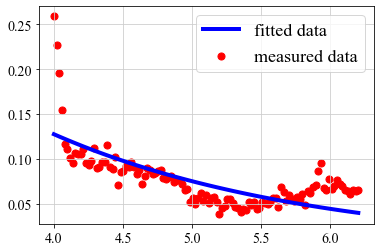

<Figure size 432x288 with 0 Axes>

In [18]:
r = r3
x0 = x0_3
lamda0 = 2.709
lamdamu = -0.185
k = k3
K = 0.001
# set parameters incluing bounds
params = Parameters()
params.add('x0', value= x0_3, min = 0.05, max = 0.4)
#params.add('r', value= r3, min=0, max=10)
params.add('r', value= 0.0, vary = False)
params.add('k', value= k3, min=0.0, max=10)
params.add('K', value = 0.001, min = 0.0,max=10)
# fit model and find predicted values
result4 = minimize(residual4, params, args=(t, data), method='leastsq')
#final = data + result.residual.reshape(data.shape)
data_fitted4 = data + result4.residual.reshape(data.shape)
print(result4.residual)
#result.residual.reshape(data.shape)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
plt.figure()
ax.scatter(t, data, marker='o', color='red', label='measured data', s=50)
# plot fitted data
ax.plot(t, data_fitted4, '-', linewidth=4, color='blue', label='fitted data')
ax.legend()
# display fitted statistics
report_fit(result4)
#ax.set_xlim([3.9, 14])
#ax.set_ylim([0, 1.1])
ax.tick_params(axis='both',which = 'major',labelsize = 14)
ax.tick_params(axis='both',which = 'minor',labelsize = 12)
plt.show()